<b><u>PROJECT NAME:-</b> Glass Identification

<b><u>PROJECT TYPE:-</b> Classification

<b><u>CONTRIBUTION:-</b> Individual.

<b><u>OBJECTIVE:-</b> To classify glass types based on their chemical composition and refractive index using machine learning models.

<b><u><h2>Import Libraries:-</b>

In [1]:
# Data handling
import pandas as pd   # Data handling and analysis.
import numpy as np    # Mathematical & numerical operations.(mean, median, std.deviation).

# Visualization
import matplotlib.pyplot as plt   # Data visualization.
import seaborn as sns             # Advanced visualization (built on matplotlib).

In [2]:
# ML Models 
from sklearn.model_selection import train_test_split   # It is used to split dataset in training set and testing set.
from sklearn.preprocessing import StandardScaler       # used for normalize/scale features. 
from sklearn.linear_model import LogisticRegression    # Classification Model (linear). Predicts probability.
from sklearn.neighbors import KNeighborsClassifier     # classified data based on the “k” nearest neighbors.
from sklearn.ensemble import RandomForestClassifier    # Reduces overfitting, gives high accuracy.
from sklearn.svm import SVC                            # Finds the best hyperplane and Good for high-dimensional data.
from sklearn.metrics import accuracy_score             # Used to measure performance of ML models.

<b><u><h2>Load Dataset:-</b>

In [3]:
data = pd.read_csv("E:data/glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.shape   # used for find total rows and columns in the dataset.

(214, 10)

In [5]:
data.info()  #summary of the DataFrame (column name, Non-null counts, Dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.describe()  # used for summary statistics for numerical columns (mean, std, min, max, quartiles).

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
# Check for null values
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
# To check how many unique categories exist in categorical columns.
data.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

<b><u><h2>Preprocessing of data(Target Variable):-</b>

In [10]:
data = data.dropna()  # drop missing rows for simplicity
x = data.drop("Type", axis=1)
y = data["Type"]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

<b><u><h2>Exploratory Data Analysis (EDA):-</b>


<b><u>1. Bar Plot – Count of each Glass Type:-</b>

C:\Users\kunwa\AppData\Local\Temp\ipykernel_6996\2333182465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, data=data, palette="Set2")


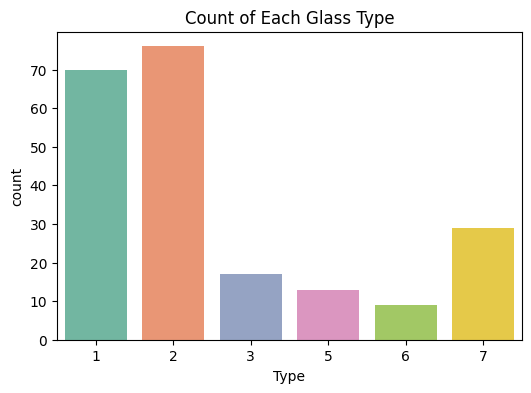

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=y, data=data, palette="Set2")
plt.title("Count of Each Glass Type")
plt.show()

<b>-->Most frequent glass types are Type 2 and Type 1, showing higher representation in the dataset.</b>

<b>-->Some glass types like Type 6 and Type 7 have fewer samples, which may affect model training.</b>

<b><u>2. Pie Chart – Glass Type Distribution:-</b>

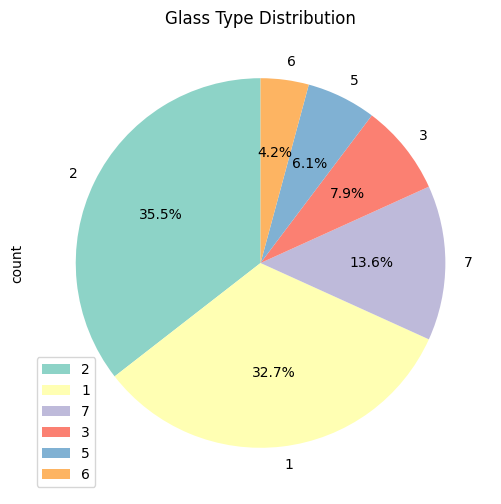

In [48]:
plt.figure(figsize=(6,6))
y.value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set3"))
plt.title("Glass Type Distribution")
plt.legend()
plt.show()

<b>-->Type 2 glass contributes the largest share, followed by Type 1 glass.</b>

<b>-->Other glass categories make up smaller percentages, indicating class imbalance.</b>

<b><u>3. Box Plot - (Refractive Index vs Glass Type):-</b>

C:\Users\kunwa\AppData\Local\Temp\ipykernel_6996\2905703866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y="RI", data=data, palette="Set1")


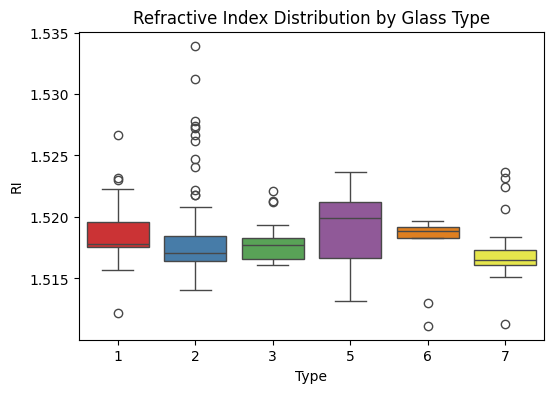

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x=y, y="RI", data=data, palette="Set1")
plt.title("Refractive Index Distribution by Glass Type")
plt.show()

<b>-->Refractive Index (RI) varies across glass types, but overlaps exist between some categories.</b>

<b>-->Certain glass types have more consistent RI values, which may help in classification.</b>

<b><u>4. Grouped Bar Plot - (Na content vs Glass Type):-<b>

C:\Users\kunwa\AppData\Local\Temp\ipykernel_6996\2653693074.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y, y="Na", data=data, ci=None, palette="Set2")
C:\Users\kunwa\AppData\Local\Temp\ipykernel_6996\2653693074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y="Na", data=data, ci=None, palette="Set2")


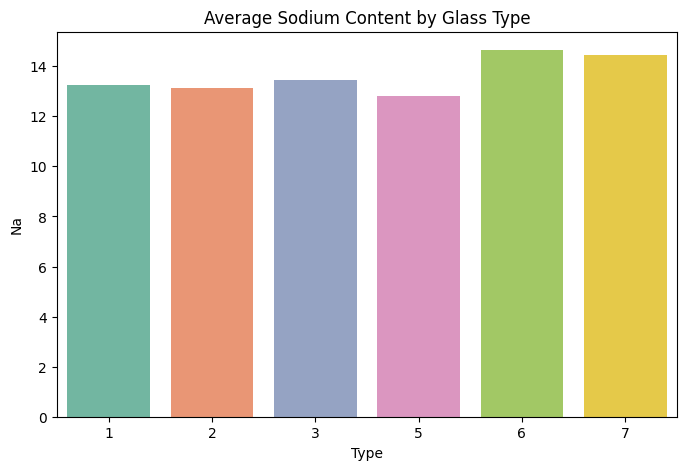

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=y, y="Na", data=data, ci=None, palette="Set2")
plt.title("Average Sodium Content by Glass Type")
plt.show()

<b>-->Sodium levels differ across glass types; for example, Type 6 has relatively higher sodium content.</b>

<b>-->These differences suggest sodium can be a useful discriminative feature.</b>

<b><u>5. Heatmap - Correlation Matrix:-</b>

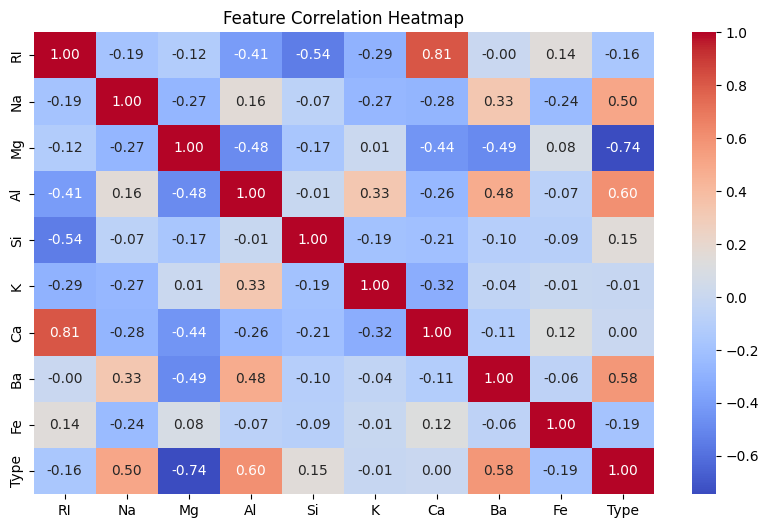

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<b>-->Strong negative correlation between RI and Si indicates an inverse relationship.</b>

<b>Features like K, Ca, Ba show weaker correlations, suggesting they may add unique information for classification.</b>

<b><u><h2>Model Building:-<b>

In [36]:
# Split dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=42)

<b><u>(a) Logistic Regression:-</b>

In [34]:
log_model = LogisticRegression(max_iter=1000)
predict=log_model.fit(x_train,y_train)
predict

C:\Users\kunwa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [35]:
log_pred = log_model.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))

Logistic Regression Accuracy: 0.6976744186046512


<b><u>(b) K-Nearest Neighbors:-</b>

In [38]:
knn_model = KNeighborsClassifier()
predict=knn_model.fit(x_train,y_train)
predict

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
knn_pred = knn_model.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

KNN Accuracy: 0.6511627906976745


<b><u>(c) Random Forest:-</b>

In [40]:
Rf_model = RandomForestClassifier()
predict = Rf_model.fit(x_train,y_train)
predict

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
Rf_pred = Rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, Rf_pred))

Random Forest Accuracy: 0.8837209302325582


<b><u>(d) Support Vector Machine:-</b>

In [42]:
svm_model = SVC()
predict = svm_model.fit(x_train,y_train)
predict

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [43]:
svm_pred = svm_model.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.32558139534883723


<b><u> Model Accuracy Comparison:-</b>

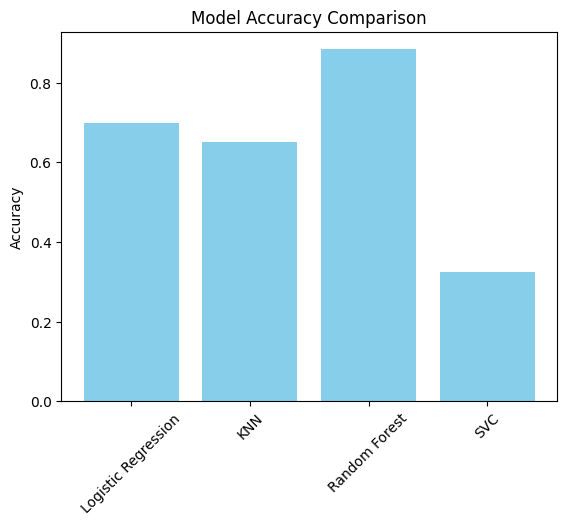

In [44]:
accuracy_results = {
    "Logistic Regression": accuracy_score(y_test, log_pred),
    "KNN": accuracy_score(y_test, knn_pred),
    "Random Forest": accuracy_score(y_test, Rf_pred),
    "SVC": accuracy_score(y_test, svm_pred)
}

plt.bar(accuracy_results.keys(), accuracy_results.values(), color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

<b><h3><u>Final Conclusion:-</b>

<b>-->Distinct chemical patterns were observed in glass samples – features like Mg, Na, and Ca show strong variation across different glass types.</b>

<b>-->Refractive Index (RI) plays a major role in differentiating between glass categories, as its distribution clearly separates some types.</b>

<b>-->The dataset has class imbalance (some glass types have fewer samples), which can affect model performance – techniques like oversampling may help.</b>